In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Q1 Import the dataset and understand it

In [98]:
loan= pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


The given data set gives information about the loans given out by LC in order to determine the borrowing risk of the applicant

1. The id is a unique id for the particular loan while member_id is an id given to the borrower, which will be same for all loans taken by him/her.
2. The DTI (Debt to Income) is the ratio of monthly debt payments(other than requested loan) to the income. It is an important indicator of borrowing risk
and a low DTI ratio is considered attractive by the loan company.
3. The following columns are unique to the applicant- annual_inc, dti, emp_length, member_id.
4. The rest of the columns are unique to the specific loan.

### Q2 List down the number of rows and columns

In [99]:
print("Number of columns and rows=")
loan.shape

Number of columns and rows=


(39717, 23)

### Q3 ‘Int_rate’ column is character type. With the help of lambda function convert into float type.

In [100]:
loan['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [101]:
loan['int_rate']= loan['int_rate'].map(lambda x: x.replace("%",""))
loan['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [102]:
loan['int_rate']= loan['int_rate'].map(lambda x: float(x))
loan['int_rate'].dtype

dtype('float64')

### Q4 Check the datatype of each column.

In [103]:
print("Data type of each column of the dataframe-")
loan.info()

Data type of each column of the dataframe-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  float64
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float6

### Q5 Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.

In [104]:
loan.dropna(axis=1, how='all', inplace= True)

In [105]:
print("Columns with complete NaN values have been removed-")
loan.head()

Columns with complete NaN values have been removed-


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


### Q6 Write the code to find the value counts of the ‘loan_status’ category column and filter only the ‘fully paid’ and ‘charged off’ categories.

In [106]:
loan_status_counts = loan['loan_status'].value_counts()
print("Loan Status Counts:\n", loan_status_counts)

Loan Status Counts:
 Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [107]:
loan[(loan['loan_status'] == 'Fully Paid') | (loan['loan_status'] == 'Charged Off') ]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,...,Source Verified,Fully Paid,wedding,11.20,5632.210000,5632.21,5000.00,632.21,Jan-15,161.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,4 years,...,Not Verified,Fully Paid,home_improvement,11.33,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,3 years,...,Not Verified,Fully Paid,credit_card,6.40,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,< 1 year,...,Not Verified,Fully Paid,debt_consolidation,2.30,5272.161128,1397.12,5000.00,272.16,Apr-08,0.00
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,< 1 year,...,Not Verified,Fully Paid,other,3.72,5174.198551,672.66,5000.00,174.20,Jan-08,0.00


### Q7 Filter the ‘Emp_Len’ column to extract the numerical value from the string.
### Hint - Emp_len : < 1year, 2 years , 3 years as 1 , 2, 3 so on.

In [108]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [109]:
def extract_num(str1):
    list1=[]
    str2=''
    
    for i in str1:
        if i.isnumeric():
            list1.append(i)
    
    for i in list1:
        str2= str2 + i
    
    return int(str2)
        

In [110]:
loan.emp_length= loan.emp_length.map(extract_num, na_action='ignore')

In [111]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,10.0,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,1.0,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,10.0,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,10.0,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,1.0,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


### Q8 Using the Lambda function, remove the month from the ‘term’ column such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

In [112]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [113]:
loan['term']= loan.term.map(lambda x: x.replace(' months', ''))

In [114]:
loan['term']= loan['term'].map(lambda x: x.replace(" ",""))
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10.0,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1.0,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10.0,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10.0,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1.0,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


In [115]:
loan.term= loan.term.map(lambda x: int(x))
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,verification_status,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10.0,...,Verified,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1.0,...,Source Verified,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10.0,...,Not Verified,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10.0,...,Source Verified,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1.0,...,Source Verified,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79


### Q9 Create a new column as risky_loan_applicant by comparing loan_amnt and funded_amnt with the following criteria -
### If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’.

In [116]:
def risk_flag(x, y):
    if x <= y:
        return 0
    else:
        return 1 

In [117]:
loan['risky_applicant']= list(map(lambda x,y: 0 if x<=y else 1, loan.loan_amnt, loan.funded_amnt))
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_applicant
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,10.0,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,1.0,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,10.0,...,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,10.0,...,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,1.0,...,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,0


### Q10 Using the bar plot visualize the loan_status column against categorical column grade, term, verification_status . Write the observation from each graph.

In [118]:
cross1= pd.crosstab(loan.loan_status, loan.grade)
cross1

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,602,1425,1347,1118,715,319,101
Current,40,345,264,222,179,73,17
Fully Paid,9443,10250,6487,3967,1948,657,198


In [119]:
cross2= pd.crosstab(loan.loan_status, loan.term)
cross2

term,36,60
loan_status,,
Charged Off,3227,2400
Current,0,1140
Fully Paid,25869,7081


In [120]:
cross3= pd.crosstab(loan.loan_status, loan.verification_status)
cross3

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,2142,1434,2051
Current,227,310,603
Fully Paid,14552,8243,10155


In [121]:
plt.figure(figsize=(10, 3))

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

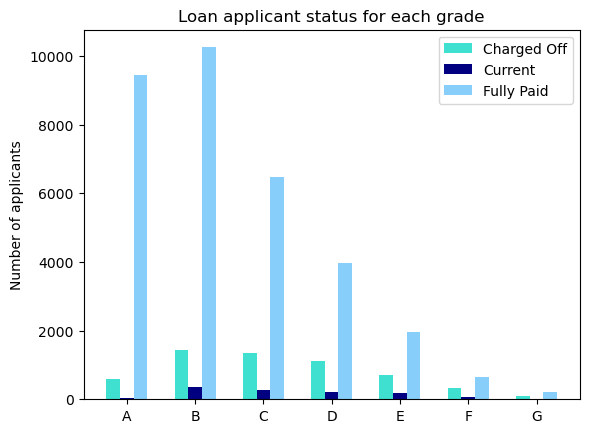

In [122]:
len1= len(cross1.columns)
positions= np.arange(0, len1*4, 4)
plt.bar(positions, height=cross1.loc['Charged Off'], width=0.8, color='turquoise', label='Charged Off')
plt.bar(positions + 0.8, height=cross1.loc['Current'], width=0.8, color='navy', label='Current')
plt.bar(positions + 1.6, height=cross1.loc['Fully Paid'], width=0.8, color='lightskyblue', label='Fully Paid')

plt.xticks(ticks= positions+0.8, labels=cross1.columns)
plt.legend()
plt.ylabel('Number of applicants')
plt.title('Loan applicant status for each grade')
plt.show()

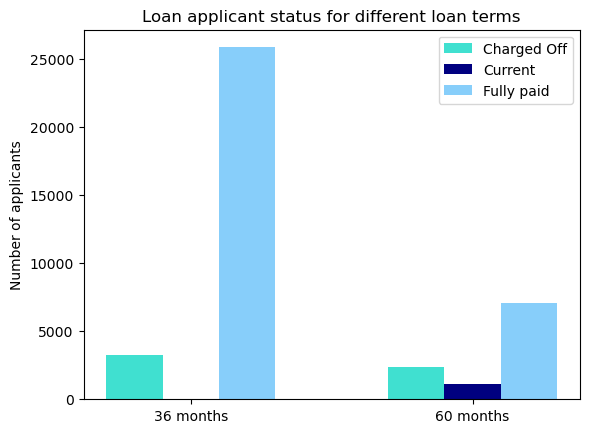

In [123]:
positions= np.arange(0, len(cross2.columns)*2, 2)
plt.bar(positions, height=cross2.iloc[0], width=0.4, color='turquoise')
plt.bar(positions + 0.4, height=cross2.iloc[1], width=0.4, color='navy')
plt.bar(positions + 0.8, height=cross2.iloc[2], width=0.4, color='lightskyblue')

plt.xticks(ticks= positions+0.4, labels=['36 months', '60 months'])
plt.legend(['Charged Off', 'Current', 'Fully paid'])
plt.ylabel('Number of applicants')
plt.title('Loan applicant status for different loan terms')
plt.show()

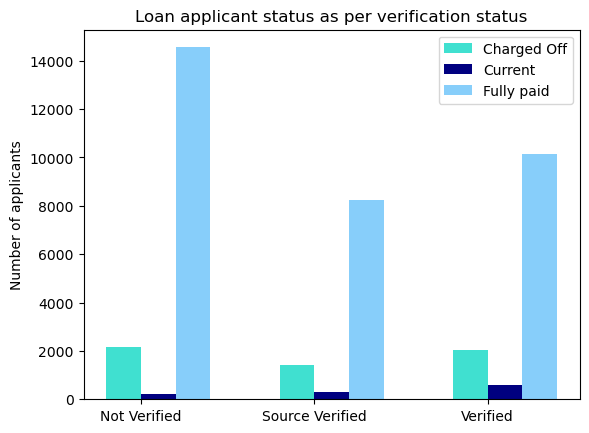

In [124]:
positions= np.arange(0, len(cross3.columns)*2, 2)
plt.bar(positions, height=cross3.iloc[0], width=0.4, color='turquoise')
plt.bar(positions + 0.4, height=cross3.iloc[1], width=0.4, color='navy')
plt.bar(positions + 0.8, height=cross3.iloc[2], width=0.4, color='lightskyblue')

plt.xticks(ticks= positions+0.2, labels=cross3.columns)
plt.legend(['Charged Off', 'Current', 'Fully paid'])
plt.ylabel('Number of applicants')
plt.title('Loan applicant status as per verification status')
plt.show()

### Q11 .Using a user defined function convert the ‘emp_len’ column into categorical column as follows -
### If emp_len is less than equals to 1 then recode as ‘fresher’.
### If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
### If emp_len is greater than 3 and less than 7 then recode as ‘senior’
### If emp_len is greater than 7 then recode as ‘expert’.

In [125]:
def length_to_cat(n):
    if n<=1:
        return 'Fresher'
    elif 1<n<=3:
        return 'Junior'
    elif 3<n<=7:
        return 'Senior'
    elif 7<n:
        return 'Expert'

In [126]:
loan['emp_length']= loan['emp_length'].map(length_to_cat)

In [127]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_applicant
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,Expert,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,Fresher,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,Expert,...,Fully Paid,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,Expert,...,Fully Paid,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,Fresher,...,Current,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,0


### Q12 Find the sum of ‘loan_amnt’ for each grade and display the distribution of ‘loan_amnt’ using a pie plot

In [128]:
print("Total loan amount for each grade-")
grade_sum = loan.groupby(['grade'])['loan_amnt'].sum()
grade_sum

Total loan amount for each grade-


grade
A     86982400
B    133651350
C     89115825
D     65160400
E     45037900
F     19263100
G      6391675
Name: loan_amnt, dtype: int64

Distribution of grade-wise loan amount


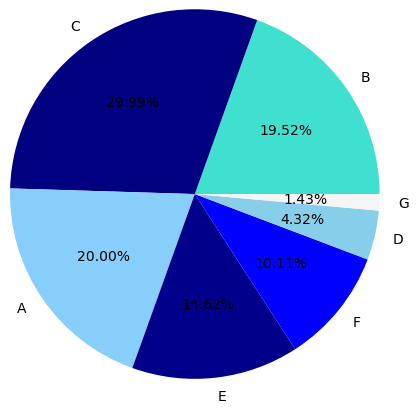

In [129]:
plt.figure(figsize=(10, 3))
li= list(loan.grade.unique())
plt.pie(grade_sum, labels= li, radius=2, autopct="%1.2f%%",
       colors=['turquoise', 'navy', 'lightskyblue', 'darkblue', 'blue', 'skyblue', 'whitesmoke'])
print('Distribution of grade-wise loan amount')
plt.show()

### ADDITIONAL QUESTIONS

### 1. What type of loans have seen most number of cases where loan was seen as unlikely to be recovered?

In [130]:
cross1 = pd.crosstab(loan.purpose, loan.loan_status)
cross1

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160,50,1339
credit_card,542,103,4485
debt_consolidation,2767,586,15288
educational,56,0,269
home_improvement,347,101,2528
house,59,14,308
major_purchase,222,37,1928
medical,106,12,575
moving,92,7,484


In [131]:
cross1['chargedoff_percent']= list(map(lambda x,y,z: (x*100)/(x+y+z), cross1['Charged Off'], cross1['Current'], cross1['Fully Paid']))
cross1

loan_status,Charged Off,Current,Fully Paid,chargedoff_percent
purpose,,,,
car,160,50,1339,10.329245
credit_card,542,103,4485,10.565302
debt_consolidation,2767,586,15288,14.843624
educational,56,0,269,17.230769
home_improvement,347,101,2528,11.659946
house,59,14,308,15.485564
major_purchase,222,37,1928,10.150892
medical,106,12,575,15.295815
moving,92,7,484,15.780446


In [132]:
print('Maximum instances where loan was declared as charged-off (written as loss) can be seen below-')
cross1['chargedoff_percent'].sort_values(ascending=False)

Maximum instances where loan was declared as charged-off (written as loss) can be seen below-


purpose
small_business        25.984683
renewable_energy      18.446602
educational           17.230769
other                 15.852742
moving                15.780446
house                 15.485564
medical               15.295815
debt_consolidation    14.843624
vacation              13.910761
home_improvement      11.659946
credit_card           10.565302
car                   10.329245
major_purchase        10.150892
wedding               10.137276
Name: chargedoff_percent, dtype: float64

### 2.Which loan type has maximum amount seen as unlikely to be recovered?

In [133]:
pivot1= pd.pivot_table(index= 'purpose', columns= 'loan_status', values= 'loan_amnt', data=loan, aggfunc=np.sum)
pivot1

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,1162275.0,385025.0,8951075.0
credit_card,7054100.0,1972650.0,51115400.0
debt_consolidation,37404100.0,10897375.0,188345825.0
educational,440100.0,NaN,1773300.0
home_improvement,4134050.0,1824225.0,28376450.0
house,745775.0,299550.0,3934725.0
major_purchase,2027975.0,479825.0,15328125.0
medical,908250.0,195125.0,4623350.0
moving,546125.0,93875.0,3237050.0


In [134]:
print('Maximum amount to be seen as loss was observed as follows-')
series1= pd.Series(pivot1['Charged Off'].sort_values(ascending = False))
series1[series1==np.max(series1)]

Maximum amount to be seen as loss was observed as follows-


purpose
debt_consolidation    37404100.0
Name: Charged Off, dtype: float64

### 3.What is the experience level of risky applicants?

In [135]:
loan.emp_length[loan.risky_applicant==1].value_counts()

Expert     617
Senior     473
Junior     371
Fresher    355
Name: emp_length, dtype: int64

### Q4 Write the code to filter only the ‘Verified’ and having loan_amnt grater than 5000.

In [136]:
loan[(loan['verification_status'] == 'Verified') & (loan['loan_amnt'] > 5000) ]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_applicant
9,1071570,1306721,5375,5375,5350.000000,60,12.69,121.45,B,Fresher,...,Charged Off,other,18.08,1476.190000,1469.34,673.48,533.42,Nov-12,121.45,0
18,1062474,1294539,6000,6000,6000.000000,36,11.71,198.46,B,Fresher,...,Fully Paid,medical,18.44,7167.072893,7167.07,6000.00,1152.07,Feb-15,16.98,0
20,1069740,1284848,20250,20250,19142.161080,60,15.27,484.63,C,Junior,...,Fully Paid,debt_consolidation,26.53,27679.050000,25433.60,20250.00,7429.05,Aug-15,6024.09,0
21,1039153,1269083,21000,21000,21000.000000,36,12.42,701.73,B,Expert,...,Charged Off,debt_consolidation,13.22,14025.400000,14025.40,10694.96,3330.44,Sep-13,701.73,0
25,1069697,1273773,15000,15000,15000.000000,36,9.91,483.38,B,Junior,...,Fully Paid,credit_card,29.44,15823.999050,15824.00,15000.00,824.00,Sep-12,2447.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38913,302378,302314,13200,13200,8700.005636,36,13.24,446.29,D,Expert,...,Charged Off,credit_card,21.06,4460.960000,2936.51,3152.96,1299.64,Feb-09,446.29,0
38914,300350,300304,7000,7000,6202.710000,36,11.34,230.30,C,Junior,...,Fully Paid,debt_consolidation,9.81,8290.792208,7326.82,6999.99,1290.80,Apr-11,243.69,0
38917,300383,300380,8000,8000,4474.992176,36,11.34,263.20,C,Senior,...,Charged Off,debt_consolidation,8.75,5691.440000,3180.68,4329.88,1190.60,Jan-10,263.20,0
38918,300918,300896,16000,16000,14025.000000,36,14.50,550.74,E,Expert,...,Fully Paid,debt_consolidation,22.27,19826.766920,17379.43,16000.00,3826.77,Apr-11,560.76,0
